In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = 'data/'

df = pd.read_csv(f'{data_dir}/jobs_step_1_final.csv')

df = df.drop(columns=['steps-step-job_id'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6957 entries, 0 to 6956
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   allocation_nodes                     6957 non-null   float64
 1   constraints                          6957 non-null   object 
 2   flags                                6957 non-null   object 
 3   group                                6957 non-null   object 
 4   nodes                                6957 non-null   object 
 5   partition                            6957 non-null   object 
 6   priority                             6957 non-null   float64
 7   required-CPUs                        6957 non-null   float64
 8   required-memory                      6957 non-null   float64
 9   state-reason                         6957 non-null   object 
 10  steps-nodes-list                     6957 non-null   object 
 11  steps-time-elapsed            

In [28]:
print(df.columns.tolist())

['allocation_nodes', 'constraints', 'flags', 'group', 'nodes', 'partition', 'priority', 'required-CPUs', 'required-memory', 'state-reason', 'steps-nodes-list', 'steps-time-elapsed', 'steps-time-end', 'steps-time-start', 'steps-time-system-microseconds', 'steps-time-total-microseconds', 'steps-time-user-microseconds', 'steps-statistics-energy-consumed', 'steps-tres-requested-average-energy', 'steps-tres-requested-total-mem', 'steps-tres-requested-total-energy', 'steps-tres-requested-total-vmem', 'steps-tres-consumed-max-energy', 'steps-tres-consumed-min-energy', 'steps-tres-consumed-average-energy', 'steps-tres-consumed-total-energy', 'tres-allocated-cpu', 'tres-allocated-mem', 'tres-allocated-node']


Text(0.5, 1.0, 'Correlation plot (only for features with absolute correlation > 0.1)')

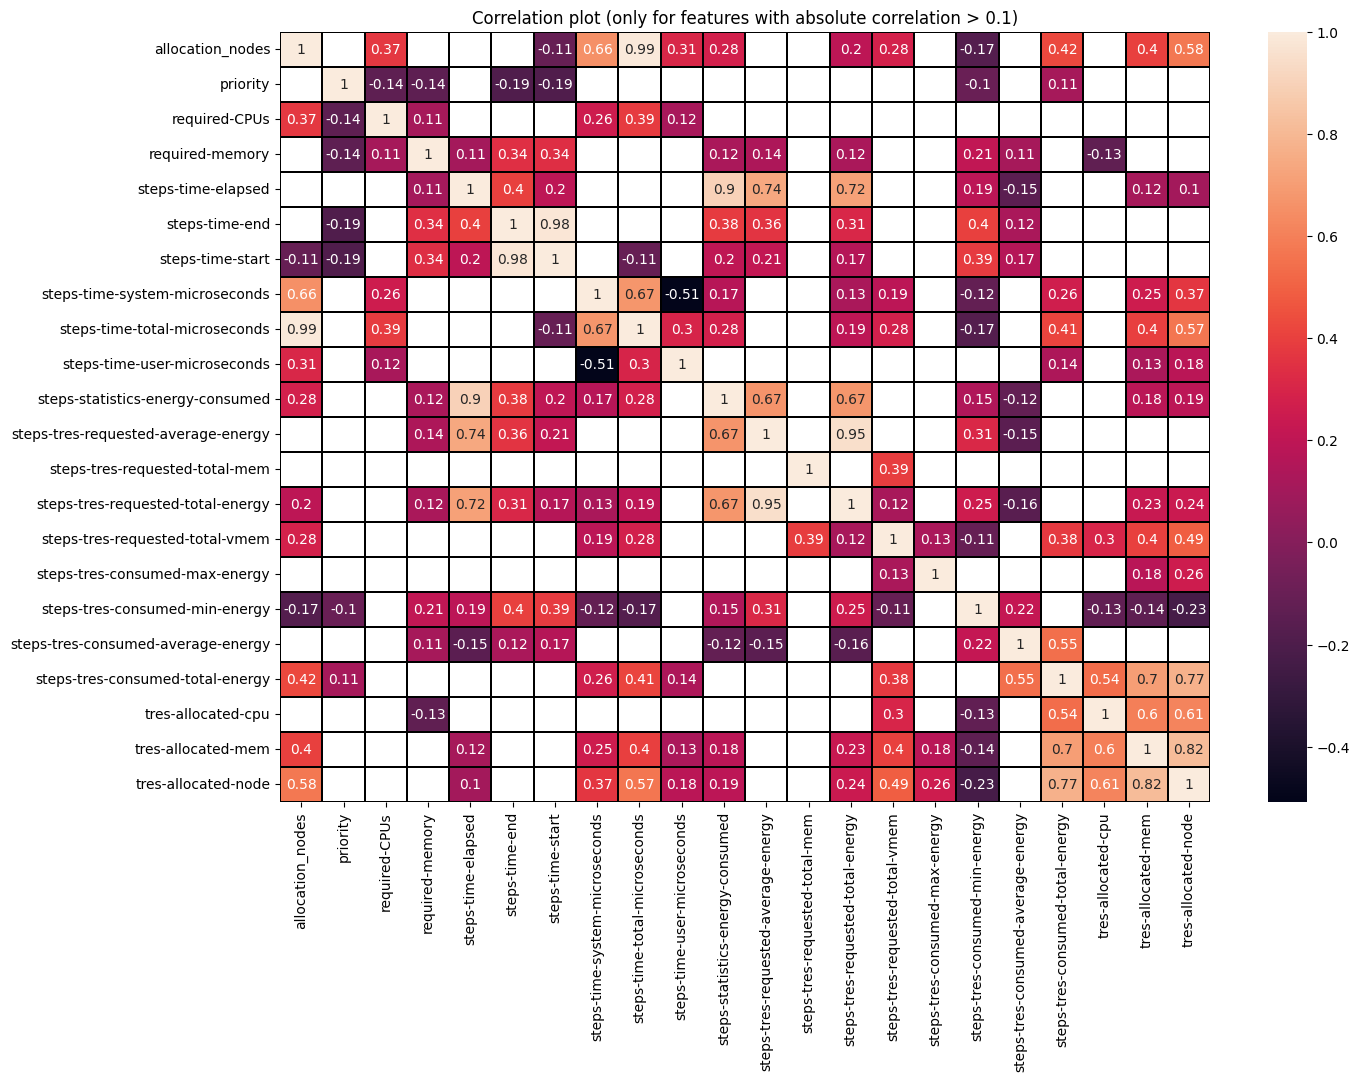

In [17]:
plt.figure(figsize=(15,10))

threshold = 0.1
corr = df.select_dtypes(exclude=['object']).corr(method='pearson').round(5)

sns.heatmap(corr[corr.abs() > threshold], annot=True, linewidths=0.1, linecolor='black')
plt.title(f'Correlation plot (only for features with absolute correlation > {threshold})')

In [3]:
(df['steps-tres-consumed-min-energy'] == df['steps-tres-consumed-max-energy']).value_counts()

True     6809
False     148
dtype: int64

Text(0.5, 1.0, 'Correlation: 0.082')

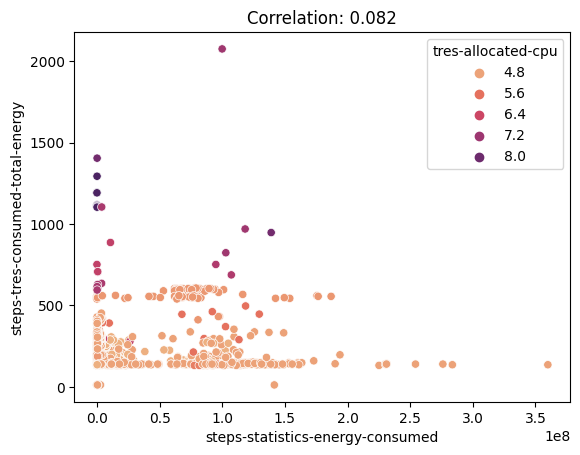

In [27]:
x = 'steps-statistics-energy-consumed'
y = 'steps-tres-consumed-total-energy'
hue =  np.log2(df['tres-allocated-cpu'])
correlation_xy = np.corrcoef(df[x], df[y])[0,1]

sns.scatterplot(data=df, 
                x=x, 
                y=y, 
                hue=hue, 
                palette='flare'
                )

plt.title(f'Correlation: {correlation_xy:.3f}')

<AxesSubplot: xlabel='steps-time-start', ylabel='steps-tres-consumed-total-energy'>

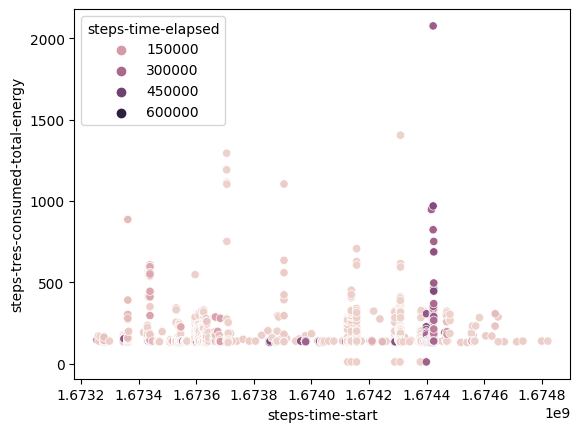

In [26]:
sns.scatterplot(data=df, x='steps-time-start', y='steps-tres-consumed-total-energy', hue='steps-time-elapsed')

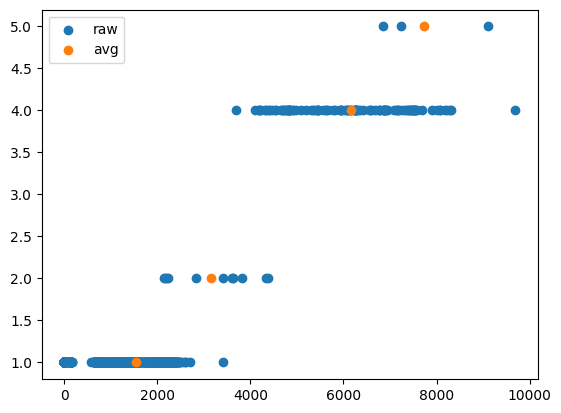

In [7]:

plt.scatter(df['steps-time-system-microseconds'], df['allocation_nodes'], label='raw')

avgs = df[['allocation_nodes', 'steps-time-system-microseconds']].groupby('allocation_nodes').mean()
plt.scatter( avgs['steps-time-system-microseconds'], avgs.index, label='avg')

plt.legend()

<AxesSubplot: >

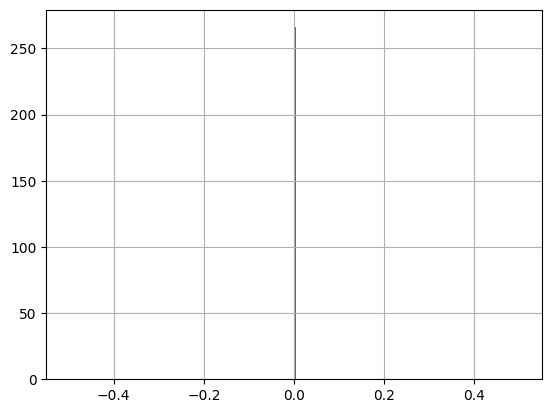

In [22]:

df['steps-statistics-energy-consumed'][df['steps-statistics-energy-consumed'] < 0.5 * 12].hist(bins=200)

In [24]:
sum(df['steps-statistics-energy-consumed'] == 0)

266